## Analysis Data Project [Air Quality Dataset(PRSA_Data_Aotizhongxin.csv)]

- Name        : Jessica Alva N
- Email       : jessicaalva@students.amikom.ac.id
- ID Dicoding : https://www.dicoding.com/users/jessica_alva/academies

## Define Questions

1. What is the correlation between PM2.5 concentrations and other variables such as temperature, humidity, and wind speed over the past year?

2. Which wind direction contributed the most to PM2.5 pollution levels from 2013 - 2017 in Aotizhongxin?

## Import All Packages/Library

In [ ]:
#read and analyse the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install windrose

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv('/content/PRSA_Data_Aotizhongxin.csv')

### Assesing Data

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
#ensure there are missing value
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [ ]:
# to print out the sum of duplicate rows in the data
duplicate = sum(df.duplicated())

print(f'There are {duplicate} duplicate data')

There are 0 duplicate data


In [ ]:
#check the fields for null values
null_columns = df.columns[df.isnull().any()]

print(f'The columns with null values are {list(null_columns)}')

The columns with null values are ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']


In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000




**Missing Value**

It appears that every column contains some empty values, since the Non-Null count for every column is lower than the total number of rows (35064). PM2,5 has 2.6% missing values, while CO has the highest number of missing values at 5%.

**Duplicate Data**

The line of code produces a value of 0, indicating that there are no duplicate rows.

### Data Cleaning

In [ ]:
#copy the dataset to save the original
data2 = df.copy()

In [ ]:
#create Date column using the year, month, day
cols = ["year", "month", "day"]
date = data2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

#insert data in the 1st index
data2.insert(1, 'date', date)

#change datatype
data2['date']=pd.to_datetime(data2['date'])

#check the changes were made
print(data2.columns)
print(data2.head())

Index(['No', 'date', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2',
       'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM',
       'station'],
      dtype='object')
   No       date  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  \
0   1 2013-03-01  2013      3    1     0    4.0   4.0   4.0   7.0  300.0   
1   2 2013-03-01  2013      3    1     1    8.0   8.0   4.0   7.0  300.0   
2   3 2013-03-01  2013      3    1     2    7.0   7.0   5.0  10.0  300.0   
3   4 2013-03-01  2013      3    1     3    6.0   6.0  11.0  11.0  300.0   
4   5 2013-03-01  2013      3    1     4    3.0   3.0  12.0  12.0  300.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  77.0  -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  72.0  -2.0  1025.2 -19.5   0.0    N   2.0  Ao

In [ ]:
#fill the null values with the average
data2_numeric = data2.select_dtypes(include=['float64', 'int64'])
data2[data2_numeric.columns]=data2_numeric.fillna(data2_numeric.mean())

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int64         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    35064 non-null  float64       
 7   PM10     35064 non-null  float64       
 8   SO2      35064 non-null  float64       
 9   NO2      35064 non-null  float64       
 10  CO       35064 non-null  float64       
 11  O3       35064 non-null  float64       
 12  TEMP     35064 non-null  float64       
 13  PRES     35064 non-null  float64       
 14  DEWP     35064 non-null  float64       
 15  RAIN     35064 non-null  float64       
 16  wd       34983 non-null  object        
 17  WSPM     35064 non-null  float6

In [ ]:
#checking if column wd has NaN value
data2[data2.wd.isna()]

,No,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6388,6389,2013-11-22,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,56.353358,-3.200000,1020.50000,-4.000000,0.000000,NaN,0.100000,Aotizhongxin
11718,11719,2014-07-02,2014,7,2,6,44.0,44.0,2.0,16.0,800.0,105.000000,21.500000,998.20000,21.500000,0.100000,NaN,0.200000,Aotizhongxin
13412,13413,2014-09-10,2014,9,10,20,56.0,141.0,13.0,81.0,700.0,99.000000,21.700000,1008.00000,15.800000,0.000000,NaN,0.000000,Aotizhongxin
16748,16749,2015-01-27,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.000000,13.584607,1011.84692,3.123062,0.067421,NaN,1.708496,Aotizhongxin
17263,17264,2015-02-18,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.000000,13.584607,1011.84692,3.123062,0.067421,NaN,1.708496,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,34315,2017-01-28,2017,1,28,18,246.0,266.0,63.0,82.0,300.0,51.000000,0.625000,1016.00000,-7.900000,0.000000,NaN,0.500000,Aotizhongxin
34334,34335,2017-01-29,2017,1,29,14,15.0,55.0,4.0,6.0,300.0,80.000000,-1.220000,1025.00000,-21.600000,0.000000,NaN,6.500000,Aotizhongxin
34560,34561,2017-02-08,2017,2,8,0,113.0,124.0,17.0,105.0,2600.0,2.000000,-2.800000,1026.30000,-7.000000,0.000000,NaN,0.200000,Aotizhongxin
34638,34639,2017-02-11,2017,2,11,6,15.0,24.0,16.0,71.0,600.0,25.000000,-4.600000,1025.00000,-18.100000,0.000000,NaN,0.200000,Aotizhongxin


In [ ]:
#count missing value column wd
data2.wd.value_counts()

,count
wd,
NE,5140
ENE,3950
SW,3359
E,2608
NNE,2445
WSW,2212
SSW,2098
N,2066
NW,1860


In [ ]:
#fill missing value column wd with ffill and bfill
data2['wd'] = data2['wd'].ffill().bfill()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int64         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    35064 non-null  float64       
 7   PM10     35064 non-null  float64       
 8   SO2      35064 non-null  float64       
 9   NO2      35064 non-null  float64       
 10  CO       35064 non-null  float64       
 11  O3       35064 non-null  float64       
 12  TEMP     35064 non-null  float64       
 13  PRES     35064 non-null  float64       
 14  DEWP     35064 non-null  float64       
 15  RAIN     35064 non-null  float64       
 16  wd       35064 non-null  object        
 17  WSPM     35064 non-null  float6

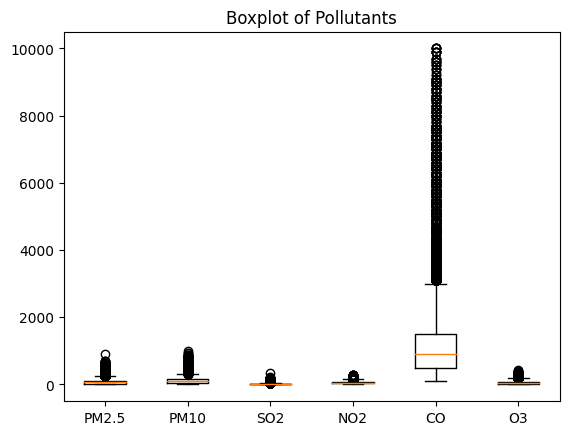

In [ ]:
#check the outliers from selected column
plt.boxplot([data2['PM2.5'], data2['PM10'], data2['SO2'],
             data2['NO2'], data2['CO'], data2['O3']])
plt.title('Boxplot of Pollutants')
plt.xticks([1, 2, 3, 4, 5, 6], ['PM2.5', 'PM10', 'SO2','NO2', 'CO', 'O3'])
plt.show()

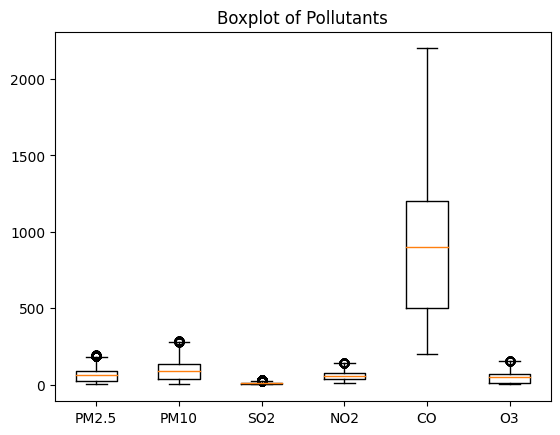

In [ ]:
#handle a lot of outliers of pollutants using IQR
pollutant_column = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for col in pollutant_column:
  Q1 = data2[col].quantile(0.25)
  Q3 = data2[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q3 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  median = data2[col].median()
  #replace outlier with median
  data2[col] = np.where((data2[col] < lower_bound) | (data2[col] > upper_bound),
                        median, data2[col])
#show boxplot
plt.boxplot([data2['PM2.5'], data2['PM10'], data2['SO2'], data2['NO2'],
             data2['CO'], data2['O3']])
plt.title('Boxplot of Pollutants')
plt.xticks([1, 2, 3, 4, 5, 6], ['PM2.5', 'PM10', 'SO2','NO2', 'CO', 'O3'])
plt.show()

On this step, the data has been cleaned by handling the missing value and reducing outliers in several columns. A date column has been added for easier analysis process

## Exploratory Data Analysis

In [ ]:
#find the highest value each pollutant
max_pm25 = data2[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].max()
print(f'The highest PM2.5 : {max_pm25}')

The highest PM2.5 : PM2.5     190.0000
PM10      284.0000
SO2        30.2736
NO2       143.0000
CO       2200.0000
O3        156.0000
dtype: float64


In [ ]:
data2 = data2.set_index('date')
#retrieve data from the selected column
data2['all_pollutant_avg'] = data2[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean(axis=1)
year_pollutant_avg = data2.groupby(data2.index.year)[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
year_pollutant_avg['all_pollutant_avg'] = year_pollutant_avg.mean(axis=1)

#find years with the highest mean
year_max = year_pollutant_avg['all_pollutant_avg'].idxmax()
mean_max = year_pollutant_avg['all_pollutant_avg'].max()

print(f'The year with the highest pollutant is {year_max} with a mean of {mean_max}')

The year with the highest pollutant is 2013 with a mean of 205.4650696616227


In [ ]:
#calculate the average of the maximum pollutant value for each year
max_pollutant = year_pollutant_avg.idxmax(axis=1)
print(max_pollutant)

date
2013    CO
2014    CO
2015    CO
2016    CO
2017    CO
dtype: object


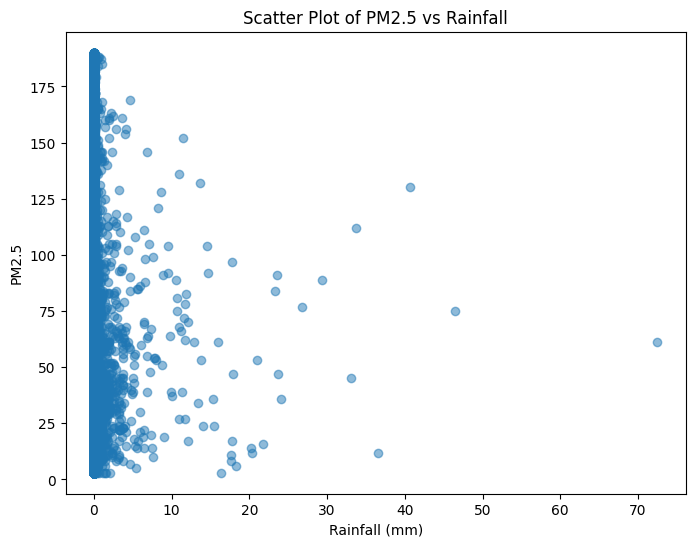

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data2['RAIN'], data2['PM2.5'], alpha=0.5)
plt.title('Scatter Plot of PM2.5 vs Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('PM2.5')
plt.show()

In [ ]:
correlation = data2['RAIN'].corr(data2['PM2.5'])
print(f'Correlation between rainfall and PM2.5: {correlation:.2f}')

Correlation between rainfall and PM2.5: -0.01


**Insights**

- The year with the highest mean of pollutant concentration is in 2013
- The highest pollutant average every year is CO.
- The value of PM2.5 tend to be higher when rainfall is low, especially when rainfall is around 0-10 mm

## Explanatory Analysis & Visualization

### Question 1

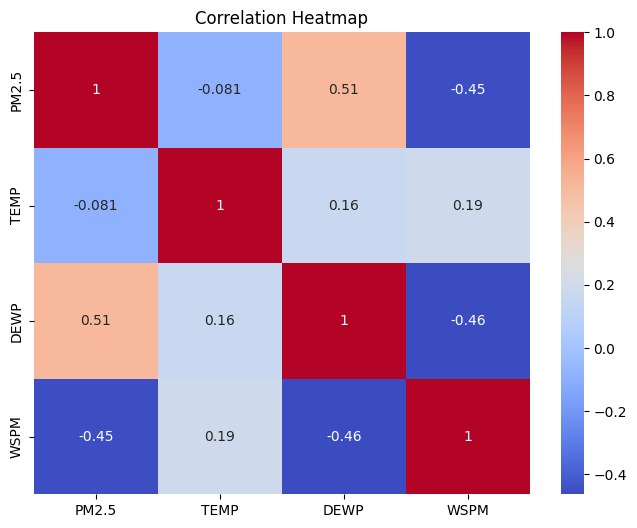

In [ ]:
#correlation all pollutants
last_year= data2[data2['date']>='2017-01-01']
var = last_year[['PM2.5', 'TEMP', 'DEWP', 'WSPM']]
correlation = var.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

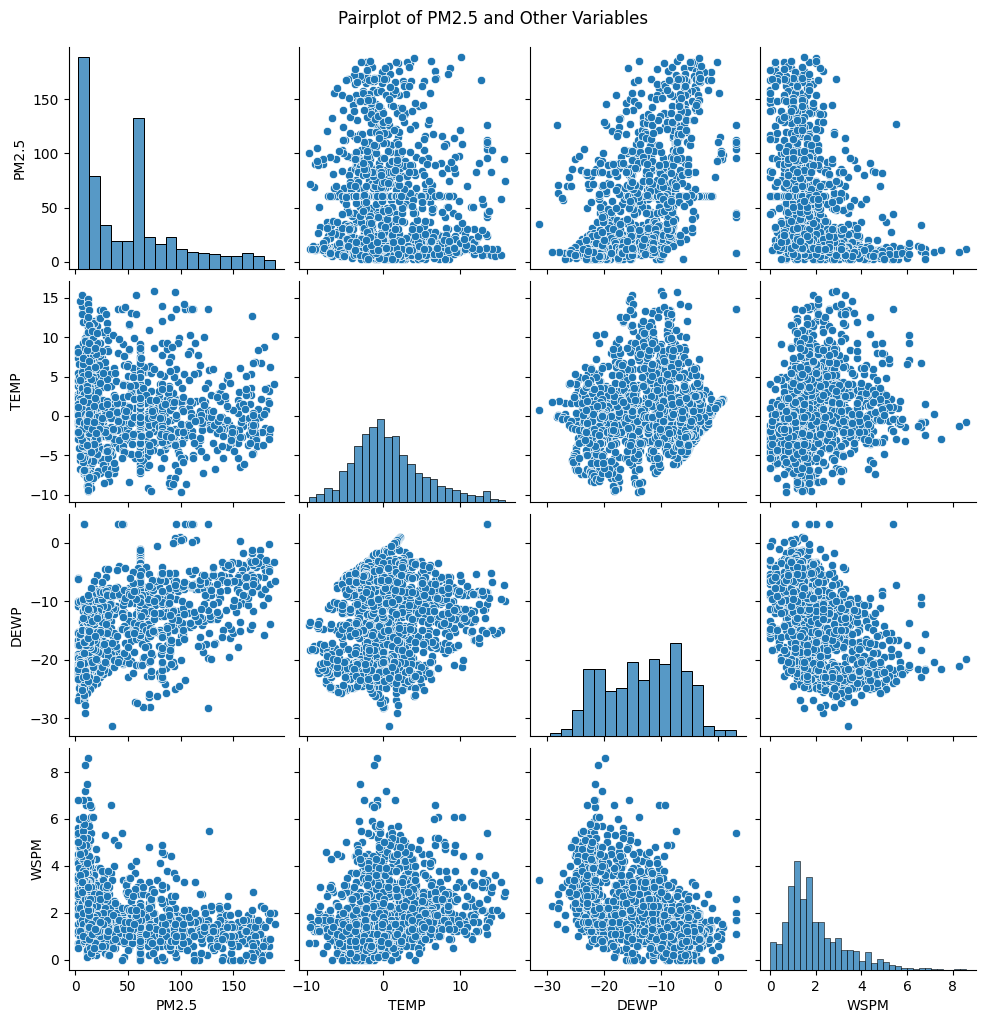

In [ ]:
sns.pairplot(var)
plt.suptitle('Pairplot of PM2.5 and Other Variables', y=1.02)
plt.show()

### Question 2

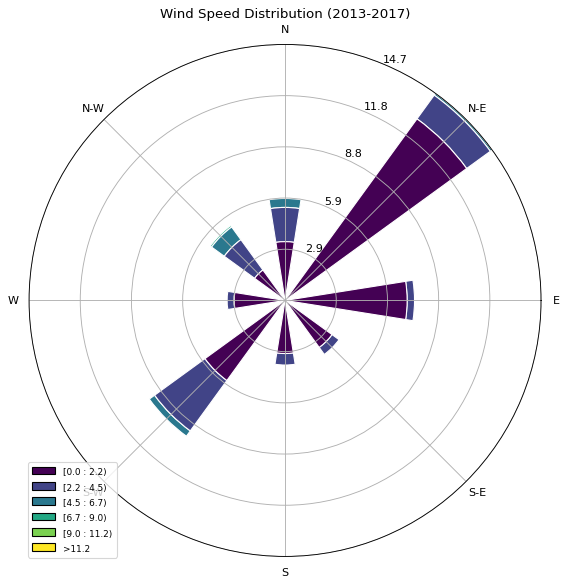

In [ ]:
#select the year
select_year = data2[(data2['date'] >= '2013-01-01') & (data2['date'] <= '2017-12-31')]

# Change wind direction into degrees
def find_angle(direction):
    direction_degrees = {
        'NE': 45, 'E': 90, 'SE': 135, 'S': 180,
        'SW': 225, 'W': 270, 'NW': 315, 'N': 360,
    }
    return direction_degrees.get(direction)

select_year['direction_degrees'] = select_year['wd'].apply(find_angle)
ax = WindroseAxes.from_ax()
ax.bar(select_year['direction_degrees'], select_year['WSPM'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Speed Distribution (2013-2017)')
plt.show()

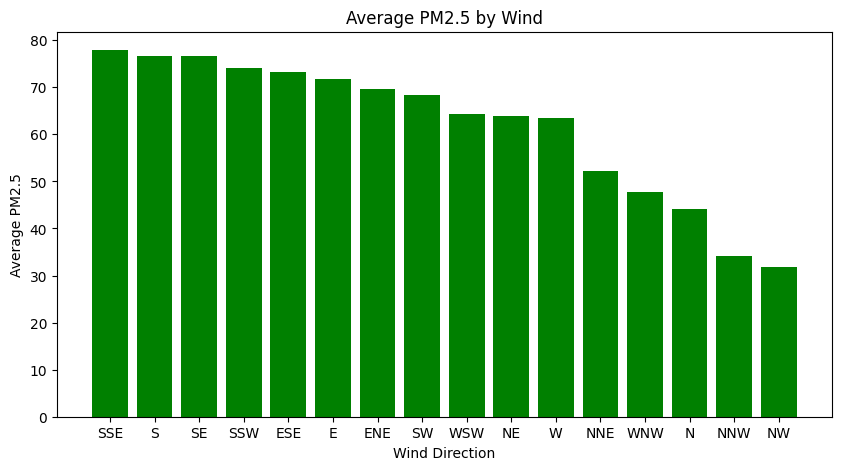

wd
SSE    77.916369
S      76.719586
SE     76.600767
SSW    74.016477
ESE    73.343941
Name: PM2.5, dtype: float64


In [ ]:
#grouping data by wind and count the average
wind_direction_counts = data2.groupby('wd')['PM2.5'].mean()
wind_direction_counts = wind_direction_counts.sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(wind_direction_counts.index, wind_direction_counts.values, color='green')
plt.title('Average PM2.5 by Wind')
plt.xlabel('Wind Direction')
plt.ylabel('Average PM2.5')
plt.show()

#count average from max to min wind directions
print(wind_direction_counts.head())

In [ ]:
#reset index, save to column
data2 = data2.reset_index()
column_date = data2.pop('date')
data2.insert(1, 'date', column_date)

In [ ]:
data2.to_csv("Air_Quality_Aotizhongxin.csv", index=False)

**Analysis Correlation**

- Humidity (DEWP) has a positive influence on PM2.5, meaning that the higher the humidity, the higher the concentration of PM2.5 in the air. On the other hand, wind speed (WSPM) has a negative effect, so as wind speed increases, the concentration of PM2.5 decreases. Meanwhile, temperature does not have a significant impact on PM2.5.

**Wind direction Analysis**

- N-E(NorthEast) direction is the most frequent wind direction. It has the largest bars in the plot, suggesting that the wind most commonly blows from this direction. Air quality is poor when coming from the east(SSE, S, SE). The wind speed from this direction tend to be lower and has higher concentrations of PM2.5.


**Conclusion**

1. Humidity (DEWP) and wind speed (WSPM) are important factors that can help understand air quality, where high humidity can cause pollution, while strong winds can help reduce it

2. Low winds that came from the south-southeast makes air pollution more difficult to spread, resulting in poorer air quality. On the other hand, stronger winds from the NE are able to spread pollutants more quickly, resulting in cleaner air. Understanding wind direction and speed is important for comprehending pollution dynamics and planning more effective pollution mitigation actions.
